**Note for Assignment 3:** The code remains unchanged from Assignment 2 until **Assignment 3: Adversarial Example**.

If you are running on HPC, Please specify all packages here as a jupyter notebook install or module load

In [ ]:
!module load anaconda/2021.11
!module load cuda/12.2
!nvidia-smi
!nvcc --version

/bin/bash: line 1: module: command not found
/bin/bash: line 1: module: command not found
Mon Mar 10 22:53:38 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100 80GB PCIe          On  | 00000000:D6:00.0 Off |                    0 |
| N/A   37C    P0              53W / 300W |      4MiB / 81920MiB |      0%      Default |
|                                         |                      |  

In [ ]:
## Specify your pip install and module load here

# already installed as we use the ee193 kernel
# %pip install torch torchvision matplotlib pandas

%pip install optuna

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%%javascript
Jupyter.notebook.kernel.restart();


<IPython.core.display.Javascript object>

In [1]:
## Your potential Task:
##Your Package imported

## For your reference, here is the package I am using

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import pandas as pd


Load Cifar 10 dataset

In [2]:
# You can also write your own data loading code

# adapted from: https://github.com/kuangliu/pytorch-cifar/blob/master/main.py

train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),       # Random cropping with padding for augmentation
    transforms.RandomHorizontalFlip(),          # Random horizontal flip for augmentation
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))  # CIFAR-10 specific stats
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transform)
trainloader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_transform)
testloader = DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

100%|██████████| 170M/170M [00:24<00:00, 7.06MB/s]


**Clarify the architecture1 you are using:  model (VGG, ResNet, even Vision Transformer)**

In [3]:
## Your task: Complete your architecture
## Code Starting Here


# Reference:
# [1] Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun
#     Deep Residual Learning for Image Recognition. arXiv:1512.03385

from torchvision.models import resnet18

def get_resnet18_for_cifar10():
    model = resnet18(pretrained=False)  # no pretrained weights
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, 10)  # CIFAR-10 has 10 classes
    return model


####

Your Training Code

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Code Starting Here

model_arch1 = get_resnet18_for_cifar10().to(device)

# print("Architecture 1 (ResNet-18 Adapted):")
# print(model_arch1)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_arch1.parameters(), lr=0.001)

num_epochs = 20
train_losses_arch1 = []
test_accuracies_arch1 = []

for epoch in range(num_epochs):
    model_arch1.train()
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_arch1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(trainloader)
    train_losses_arch1.append(avg_loss)

    # evaluate test accuracy at the end of this epoch
    model_arch1.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model_arch1(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracy = 100 * correct / total
    test_accuracies_arch1.append(test_accuracy)

    print(f"[Arch1] Epoch {epoch+1}/{num_epochs}, Training Loss: {avg_loss:.3f}, Test Accuracy: {test_accuracy:.2f}%")
####


/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


[Arch1] Epoch 1/20, Training Loss: 1.545, Test Accuracy: 53.63%
[Arch1] Epoch 2/20, Training Loss: 1.198, Test Accuracy: 60.40%
[Arch1] Epoch 3/20, Training Loss: 1.029, Test Accuracy: 66.68%
[Arch1] Epoch 4/20, Training Loss: 0.929, Test Accuracy: 70.35%
[Arch1] Epoch 5/20, Training Loss: 0.854, Test Accuracy: 71.54%
[Arch1] Epoch 6/20, Training Loss: 0.794, Test Accuracy: 74.67%
[Arch1] Epoch 7/20, Training Loss: 0.736, Test Accuracy: 74.83%
[Arch1] Epoch 8/20, Training Loss: 0.699, Test Accuracy: 75.48%
[Arch1] Epoch 9/20, Training Loss: 0.668, Test Accuracy: 77.54%
[Arch1] Epoch 10/20, Training Loss: 0.638, Test Accuracy: 77.03%
[Arch1] Epoch 11/20, Training Loss: 0.609, Test Accuracy: 78.61%
[Arch1] Epoch 12/20, Training Loss: 0.584, Test Accuracy: 79.39%
[Arch1] Epoch 13/20, Training Loss: 0.563, Test Accuracy: 78.67%
[Arch1] Epoch 14/20, Training Loss: 0.538, Test Accuracy: 79.10%
[Arch1] Epoch 15/20, Training Loss: 0.528, Test Accuracy: 80.44%
[Arch1] Epoch 16/20, Training Loss

Your Testing Code

In [ ]:
## Code Starting Here


model_arch1.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_arch1(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
final_test_accuracy = 100 * correct / total

####

Save Your Model

In [ ]:
torch.save(model_arch1.state_dict(), './model_architecture_1.pth')
print("Model saved as model_architecture_1.pth")

## Save your log file and upload to Canvas
# Your Code Here


log_data = {
    "Epoch": list(range(1, num_epochs + 1)),
    "Training Loss": train_losses_arch1,
    "Test Accuracy (%)": test_accuracies_arch1
}
df_log = pd.DataFrame(log_data)
df_log.to_csv("training_log_arch1.csv", index=False)
print("Training log saved as training_log_arch1.csv")


###

Model saved as model_architecture_1.pth
Training log saved as training_log_arch1.csv


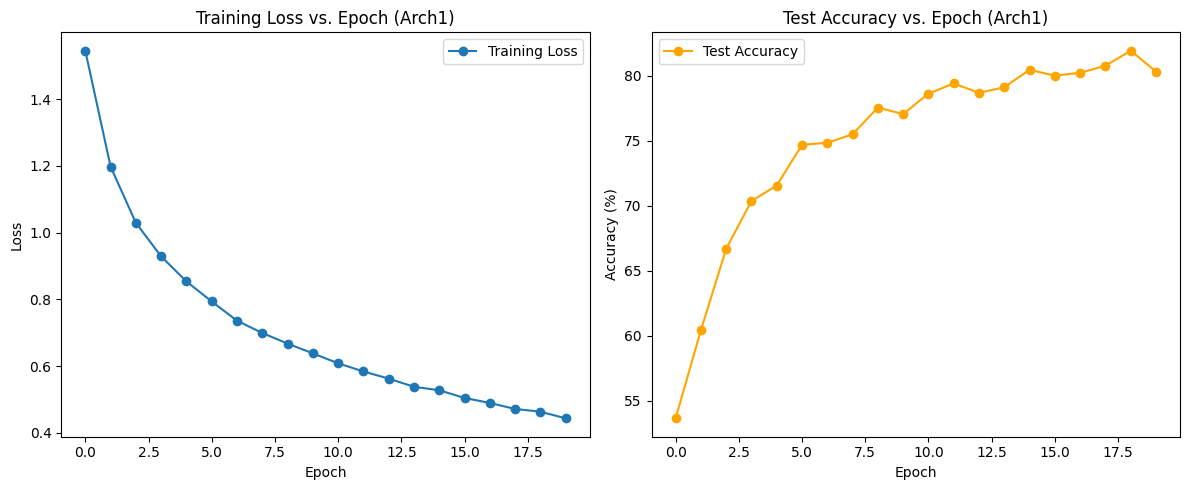

In [ ]:
## Visualization for Architecture 1


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses_arch1, marker='o', label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss vs. Epoch (Arch1)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_accuracies_arch1, marker='o', color='orange', label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Test Accuracy vs. Epoch (Arch1)")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
## Code to Load and Verify the Model for Architecture 1

loaded_model_arch1 = get_resnet18_for_cifar10()
loaded_model_arch1.load_state_dict(torch.load('./model_architecture_1.pth'))
loaded_model_arch1.to(device)
loaded_model_arch1.eval()

correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = loaded_model_arch1(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
verified_accuracy = 100 * correct / total
print(f"Loaded Model Test Accuracy: {verified_accuracy:.2f}%")


/tmp/ipykernel_84089/3874004130.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_arch1.load_state_dict(torch.load('./model_architecture_1.pth'))


Loaded Model Test Accuracy: 80.31%


**Clarify the architecture2 you are using:  Input -> Conv Layer 1 -> Max Pooling -> Conv Layer 2 -> Max Pooling -> Conv Layer 3 -> Max Pooling -> Flatten -> FC1 -> FC2 -> Output**

In [4]:
## Your task: Complete your architecture
## Code Starting Here

class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
# Your Code Here
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)   # input channels 3, output 32
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # After three poolings: CIFAR-10 images (32x32) become 4x4 feature maps.
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))   # Conv Layer 1 → ReLU → Max Pooling
        x = self.pool(F.relu(self.conv2(x)))   # Conv Layer 2 → ReLU → Max Pooling
        x = self.pool(F.relu(self.conv3(x)))   # Conv Layer 3 → ReLU → Max Pooling
        x = x.view(x.size(0), -1)              # Flatten
        x = F.relu(self.fc1(x))                # FC1 → ReLU
        x = self.fc2(x)                        # FC2 → Output (for classification, no activation here)
        return x



###



model = MyCNN()
print(model)
####

MyCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


If you successfully write your model architecture, run the following training code with testing

In [5]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# you can adjust the hyperparameters by yourself
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) # use your own learning rate

num_epochs = 20  # use your own epoch
train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    # Train
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    avg_loss = running_loss / len(trainloader)
    train_losses.append(avg_loss)


    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracy = 100 * correct / total
    test_accuracies.append(test_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.3f}, Test Accuracy: {test_accuracy:.2f}%")

print('Finished Training')

Epoch 1/20, Loss: 1.564, Test Accuracy: 54.52%
Epoch 2/20, Loss: 1.190, Test Accuracy: 64.74%
Epoch 3/20, Loss: 1.017, Test Accuracy: 67.90%
Epoch 4/20, Loss: 0.905, Test Accuracy: 72.83%
Epoch 5/20, Loss: 0.826, Test Accuracy: 73.74%
Epoch 6/20, Loss: 0.768, Test Accuracy: 75.18%
Epoch 7/20, Loss: 0.721, Test Accuracy: 76.17%
Epoch 8/20, Loss: 0.689, Test Accuracy: 77.36%
Epoch 9/20, Loss: 0.659, Test Accuracy: 76.67%
Epoch 10/20, Loss: 0.633, Test Accuracy: 77.94%
Epoch 11/20, Loss: 0.610, Test Accuracy: 78.96%
Epoch 12/20, Loss: 0.591, Test Accuracy: 78.11%
Epoch 13/20, Loss: 0.571, Test Accuracy: 79.62%
Epoch 14/20, Loss: 0.560, Test Accuracy: 78.75%
Epoch 15/20, Loss: 0.546, Test Accuracy: 79.83%
Epoch 16/20, Loss: 0.522, Test Accuracy: 79.86%
Epoch 17/20, Loss: 0.513, Test Accuracy: 81.41%
Epoch 18/20, Loss: 0.503, Test Accuracy: 80.21%
Epoch 19/20, Loss: 0.494, Test Accuracy: 80.69%
Epoch 20/20, Loss: 0.483, Test Accuracy: 80.07%
Finished Training


Visualization

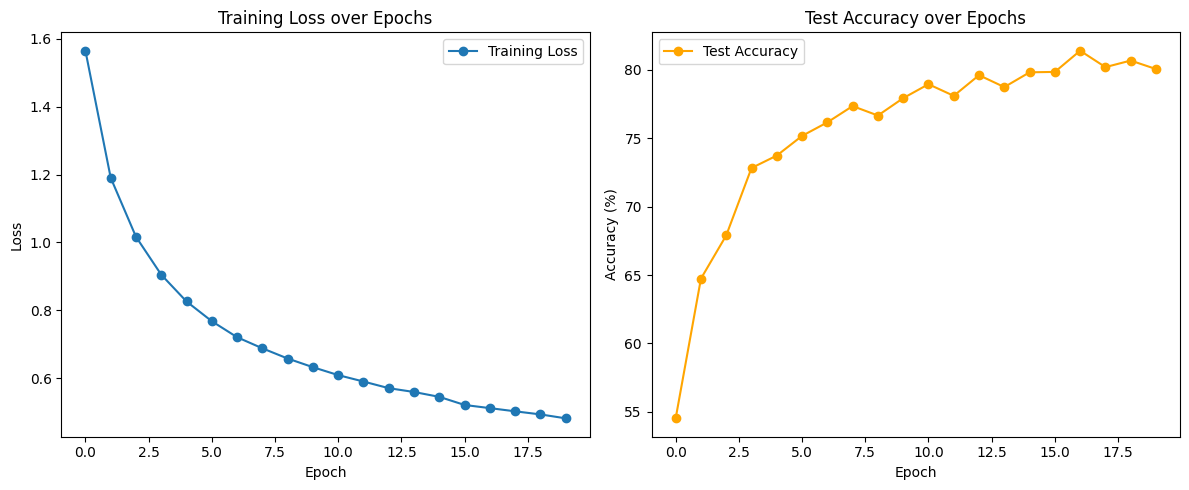

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, marker='o', label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.legend()

# plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, marker='o', color='orange', label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Test Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

Save Model

In [7]:
torch.save(model.state_dict(), './model_architecture_2.pth')

## Save your log file, and make sure you can load the model as well


log_data_arch2 = {
    "Epoch": list(range(1, num_epochs + 1)),
    "Training Loss": train_losses,    # recorded during training
    "Test Accuracy (%)": test_accuracies  # recorded at the end of each epoch
}

df_log_arch2 = pd.DataFrame(log_data_arch2)
df_log_arch2.to_csv("training_log_arch2.csv", index=False)
print("Training log saved as training_log_arch2.csv")
## Your saved model can be used in future assignments


Training log saved as training_log_arch2.csv


In [8]:
## Code to Load and Verify the Model for Architecture 2

loaded_model_arch2 = MyCNN()
loaded_model_arch2.load_state_dict(torch.load('./model_architecture_2.pth'))
loaded_model_arch2.to(device)
loaded_model_arch2.eval()


correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = loaded_model_arch2(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

final_test_accuracy = 100 * correct / total
print(f"Loaded model test accuracy: {final_test_accuracy:.2f}%")


Loaded model test accuracy: 80.07%


Hyperparameter Tuning (you can do manual hyperparameter adjustment as well with No panelty.)

**Note:** Hyperparameter tuning from Assignment 2 is omitted in Assignment 3 below.

**Assignment3: Adversarial Example**

0. Load your pre-trained Model

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MyCNN().to(device)
model.load_state_dict(torch.load('./model_architecture_2.pth', map_location=device))
model.eval()


classes = testset.classes

Define the Lp distance you would like to use. L2 is recommended.

In [10]:
def compute_lp_distance(perturbation):
    """
    Computes the L2 (Euclidean) distance of the perturbation.
    For a batch, we flatten each perturbation and compute its L2 norm,
    then return the average across the batch.
    """


    # TODO: define you Lp
# Your Code Here

    distance = torch.norm(perturbation.view(perturbation.size(0), -1), p=2, dim=1).mean()


###
    return distance

1. Adversarial Example Generation

In [11]:
def generate_adversarial(model, image, label, epsilon, device):
    """
    Generates an adversarial example using a Projected Gradient Descent (PGD) method
    under an L2 norm constraint.

    Parameters:
      - model   : pre-trained classifier (Architecture 2).
      - image   : the original image tensor (batch).
      - label   : the true label tensor (batch).
      - epsilon : maximum allowed L2 perturbation.
      - device  : 'cuda' or 'cpu'.

    Internal PGD parameters:
      - num_steps: number of iterations (here 40).
      - step_size: update step size (epsilon / num_steps).

    Returns:
      - adv_image   : the adversarial image
      - perturbation: adv_image - original image
      - distance    : the average L2 distance of the perturbation
    """

# Your Code Here


    # Start from the original image.
    adv_image = image.clone().detach().to(device)
    adv_image.requires_grad = True

    criterion = nn.CrossEntropyLoss()

    # PGD parameters
    num_steps = 40
    step_size = epsilon / num_steps

    for _ in range(num_steps):
        # Forward pass
        outputs = model(adv_image)
        loss = criterion(outputs, label)

        # Zero out existing gradients
        model.zero_grad()
        if adv_image.grad is not None:
            adv_image.grad.data.zero_()

        # Compute gradients wrt adv_image
        loss.backward()
        grad = adv_image.grad.detach()

        # L2 normalization of gradient (per sample in the batch)
        grad_norm = torch.norm(grad.view(grad.size(0), -1), p=2, dim=1).view(-1, 1, 1, 1) + 1e-8

        # Gradient ascent step
        adv_image = adv_image + step_size * grad / grad_norm

        # Project onto L2 ball of radius epsilon
        perturbation = adv_image - image
        perturb_norm = torch.norm(perturbation.view(perturbation.size(0), -1), p=2, dim=1).view(-1, 1, 1, 1)
        factor = torch.clamp(epsilon / (perturb_norm + 1e-8), max=1.0)
        perturbation = perturbation * factor

        # Update adv_image
        adv_image = image + perturbation
        adv_image = adv_image.detach()
        adv_image.requires_grad = True

    # Final values
    perturbation = adv_image - image
    distance = compute_lp_distance(perturbation)



###

    return adv_image, perturbation, distance

dataiter = iter(testloader)
original, label = next(dataiter)
original, label = original.to(device), label.to(device)

epsilon = 1.8   ## Adjust your own epsilon here

adv_image, perturbation, distance = generate_adversarial(model, original, label, epsilon, device)

global_original = original.detach()
global_adv = adv_image.detach()
global_perturbation = perturbation.detach()


print("adversarial example generated")

adversarial example generated


3. perturbed image Visualization

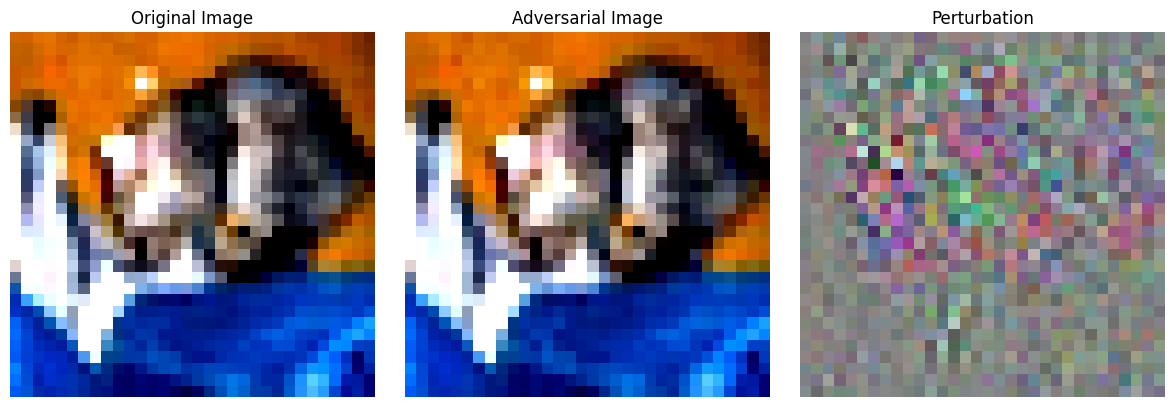

In [12]:
# === visualize_adversarial.py ===
import matplotlib.pyplot as plt
import numpy as np
import torch

def imshow(img):

    img = img.detach().cpu().numpy()
    img = (img * 0.5) + 0.5
    npimg = np.transpose(img, (1, 2, 0))
    return np.clip(npimg, 0, 1)

try:
    global_original
    global_adv
    global_perturbation
except NameError:
    raise NameError("makesure global_original, global_adv, global_perturbation has defined")


orig_img = imshow(global_original[0])
adv_img = imshow(global_adv[0])

pert = global_perturbation[0].detach().cpu().numpy()
pert = (pert - pert.min()) / (pert.max() - pert.min() + 1e-8)
pert = np.transpose(pert, (1, 2, 0))


plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(orig_img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(adv_img)
plt.title("Adversarial Image")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(pert)
plt.title("Perturbation")
plt.axis('off')

plt.tight_layout()
plt.show()

4. Classification Result

In [13]:
with torch.no_grad():
    output_orig = model(global_original)
    _, pred_orig = torch.max(output_orig.data, 1)
    output_adv = model(global_adv)
    _, pred_adv = torch.max(output_adv.data, 1)

# Ensure the 'classes' variable is defined by reloading it if necessary.
try:
    classes
except NameError:
    classes = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform).classes

print("Original image predicted as:", classes[pred_orig[0].item()])
print("Adversarial image predicted as:", classes[pred_adv[0].item()])

Original image predicted as: cat
Adversarial image predicted as: dog


5. Applying your perturbation to 10 classes and compute the Lp distance as well as its average

Class 'cat' - L2 distance: 1.6658
Class 'ship' - L2 distance: 1.6677
Class 'airplane' - L2 distance: 1.6764
Class 'frog' - L2 distance: 1.6562
Class 'automobile' - L2 distance: 1.6823
Class 'truck' - L2 distance: 1.6171
Class 'dog' - L2 distance: 1.6423
Class 'horse' - L2 distance: 1.6907
Class 'deer' - L2 distance: 1.5182
Class 'bird' - L2 distance: 1.6321

Average L2 distance over 10 classes: 1.6449


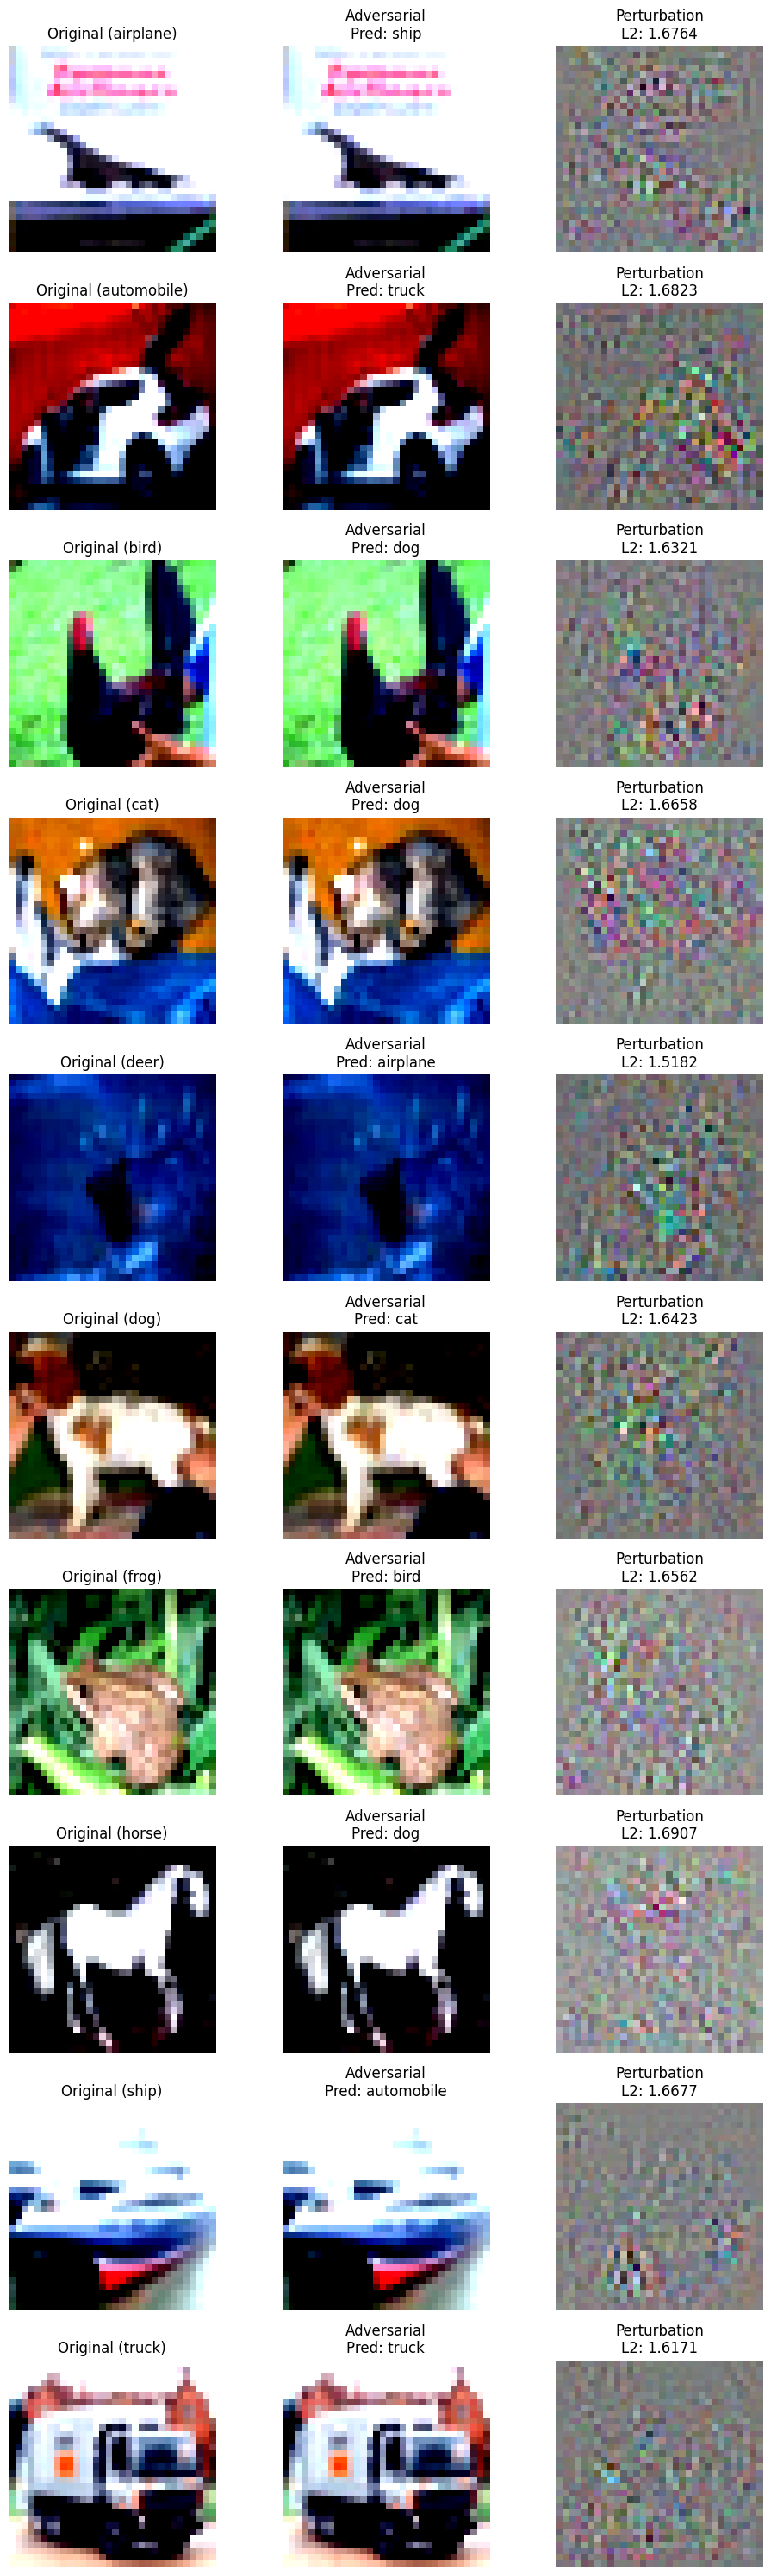

In [14]:
# === visualize_adversarial_multi.py ===
# Your Code Here

import matplotlib.pyplot as plt
import numpy as np
import torch

# Helper function: Get one image per class from the testset.
def get_one_image_per_class(dataset):
    """
    Returns a dictionary mapping each class index (0-9) to one image (with batch dimension)
    from the dataset.
    """
    images = {}
    for img, label in dataset:
        if label not in images:
            images[label] = img.unsqueeze(0)  # add batch dimension
        if len(images) == 10:  # once we have one image per class, break out
            break
    return images

# Retrieve one image per class.
one_image_per_class = get_one_image_per_class(testset)

# Dictionaries to store adversarial examples and L2 distances.
adv_examples = {}
lp_distances = {}

# Use the same epsilon as defined earlier.
epsilon = 1.8

# For each class, generate an adversarial example.
for label, img in one_image_per_class.items():
    img = img.to(device)
    # Create a tensor for the label (batch of 1).
    label_tensor = torch.tensor([label]).to(device)

    # Generate the adversarial example using the provided function.
    adv_img, perturbation, distance = generate_adversarial(model, img, label_tensor, epsilon, device)

    adv_examples[label] = (img, adv_img, perturbation)
    lp_distances[label] = distance.item()
    print(f"Class '{classes[label]}' - L2 distance: {distance.item():.4f}")

# Compute the average L2 distance over the 10 classes.
avg_distance = sum(lp_distances.values()) / len(lp_distances)
print(f"\nAverage L2 distance over 10 classes: {avg_distance:.4f}")

# Visualization: Create a figure with 10 rows (one per class) and 3 columns for:
# Original, Adversarial, and Perturbation images.
fig, axs = plt.subplots(10, 3, figsize=(10, 30))
for i in range(10):
    # Retrieve the original, adversarial, and perturbation images for the current class.
    orig, adv, pert = adv_examples[i]

    # Compute the adversarial prediction.
    with torch.no_grad():
        output_adv = model(adv)
        _, pred_adv = torch.max(output_adv.data, 1)
    adv_pred_label = classes[pred_adv.item()]

    # Convert images for visualization using the provided imshow function.
    orig_img = imshow(orig[0])
    adv_img = imshow(adv[0])

    # Normalize the perturbation for visualization.
    pert_np = pert[0].detach().cpu().numpy()
    pert_np = (pert_np - pert_np.min()) / (pert_np.max() - pert_np.min() + 1e-8)
    pert_img = np.transpose(pert_np, (1, 2, 0))

    # Plot the Original image.
    axs[i, 0].imshow(orig_img)
    axs[i, 0].set_title(f"Original ({classes[i]})")
    axs[i, 0].axis('off')

    # Plot the Adversarial image with predicted label.
    axs[i, 1].imshow(adv_img)
    axs[i, 1].set_title(f"Adversarial\nPred: {adv_pred_label}")
    axs[i, 1].axis('off')

    # Plot the Perturbation and show its L2 distance.
    axs[i, 2].imshow(pert_img)
    axs[i, 2].set_title(f"Perturbation\nL2: {lp_distances[i]:.4f}")
    axs[i, 2].axis('off')

plt.tight_layout()
plt.show()




###


We implemented our adversarial attack using a Projected Gradient Descent (PGD) method with the L2 norm as our distance metric. Initially, we set the perturbation bound (ε) to 1.2 and used 40 iterations (with a step size of ε/40) to generate adversarial examples. However, with ε = 1.2, the generated examples did not cause misclassification, as the classifier's predictions remained unchanged. We then increased ε to 1.8, which resulted in misclassification for some images but was not consistent across all classes. This iterative tuning process demonstrated that a larger ε was necessary to effectively push the images over the decision boundary while still keeping the perturbation as small as possible.

**Grading**

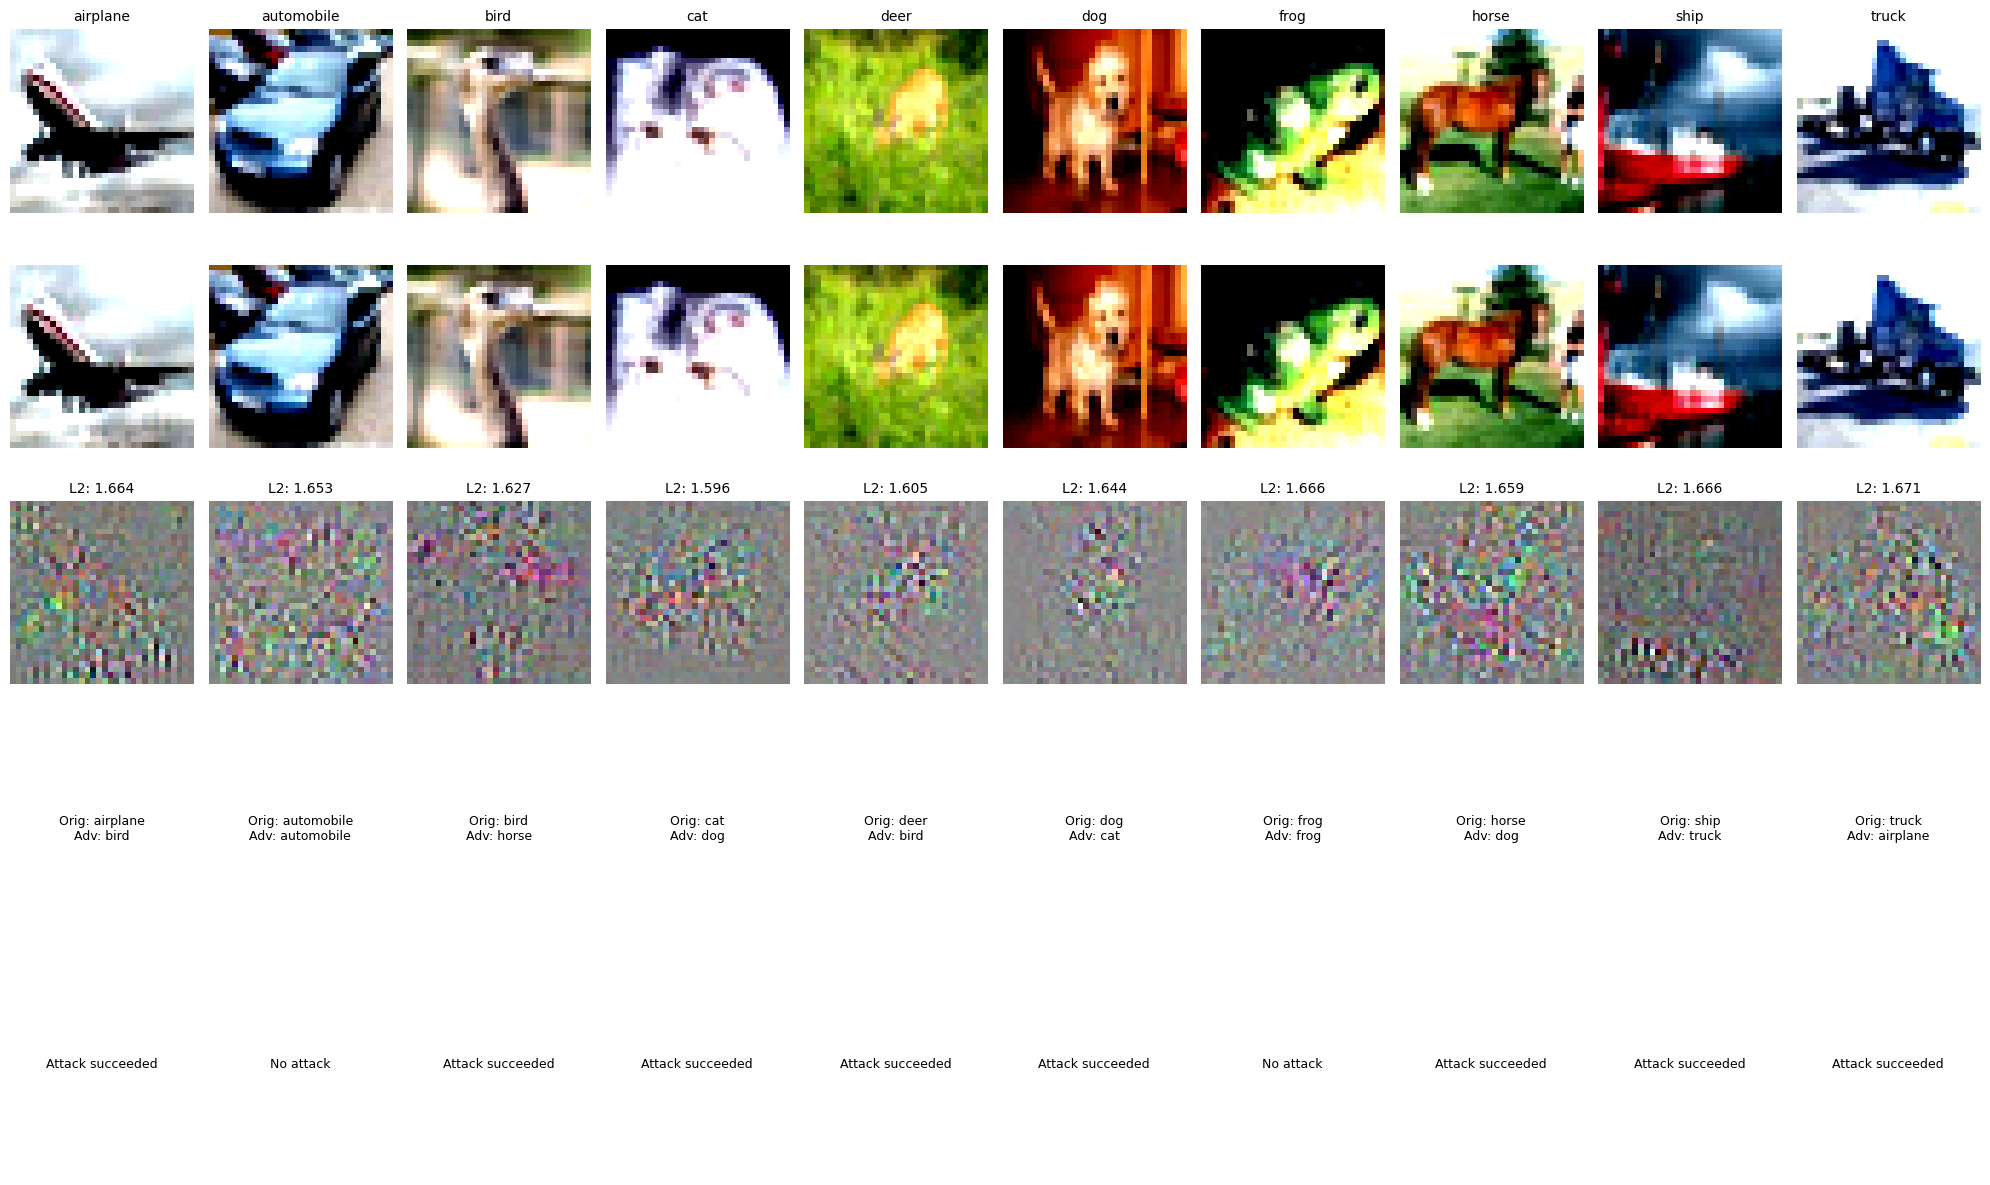

In [15]:
import random
import numpy as np
import matplotlib.pyplot as plt
import torch

# Fix random seed for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# Group indices for each class from the testset
class_indices = {i: [] for i in range(10)}
for idx, (img, label) in enumerate(testset):
    class_indices[label].append(idx)

# Randomly select one index per class using the fixed random seed
selected_indices = {}
for cls in range(10):
    selected_indices[cls] = random.choice(class_indices[cls])

# Generate adversarial examples for each selected image
original_images = []
adv_images = []
perturbations = []
distances = []
selected_labels = []

for cls in range(10):
    idx = selected_indices[cls]
    img, label = testset[idx]
    selected_labels.append(label)

    # Prepare the image and label with a batch dimension and send to device
    img_batch = img.unsqueeze(0).to(device)
    label_tensor = torch.tensor([label]).to(device)

    # Generate adversarial example
    adv_img, perturbation, distance = generate_adversarial(model, img_batch, label_tensor, epsilon, device)

    original_images.append(img)
    adv_images.append(adv_img.squeeze(0).detach().cpu())
    perturbations.append(perturbation.squeeze(0).detach().cpu())
    distances.append(distance.item())

# Helper function for visualization: reverse normalization
def imshow(img):
    img = img.detach().cpu().numpy()
    img = (img * 0.5) + 0.5
    npimg = np.transpose(img, (1, 2, 0))
    return np.clip(npimg, 0, 1)

# --- Compute classification results for each image ---
original_preds = []
adv_preds = []

for i in range(10):
    orig_img = original_images[i]
    adv_img = adv_images[i]

    # Ensure the image has a batch dimension
    if orig_img.dim() == 3:
        orig_img_batch = orig_img.unsqueeze(0).to(device)
    else:
        orig_img_batch = orig_img.to(device)

    if adv_img.dim() == 3:
        adv_img_batch = adv_img.unsqueeze(0).to(device)
    else:
        adv_img_batch = adv_img.to(device)

    # Forward pass to get predictions
    with torch.no_grad():
        output_orig = model(orig_img_batch)
        output_adv = model(adv_img_batch)

    _, pred_orig = torch.max(output_orig, 1)
    _, pred_adv = torch.max(output_adv, 1)

    original_preds.append(classes[pred_orig.item()])
    adv_preds.append(classes[pred_adv.item()])

# Determine attack result for each image
attack_results = []
for orig, adv in zip(original_preds, adv_preds):
    if orig != adv:
        attack_results.append("Attack succeeded")
    else:
        attack_results.append("No attack")

# --- Plotting: 5 rows x 10 columns ---


fig, axes = plt.subplots(5, 10, figsize=(20, 12))

for i in range(10):
    # Row 0: Original image with true class title
    axes[0, i].imshow(imshow(original_images[i]))
    axes[0, i].axis('off')
    axes[0, i].set_title(f"{classes[selected_labels[i]]}", fontsize=10)

    # Row 1: Adversarial image
    axes[1, i].imshow(imshow(adv_images[i]))
    axes[1, i].axis('off')

    # Row 2: Perturbation visualization (normalized for display) with L2 distance in title
    pert = perturbations[i].numpy()
    pert_norm = (pert - pert.min()) / (pert.max() - pert.min() + 1e-8)
    pert_norm = np.transpose(pert_norm, (1, 2, 0))
    axes[2, i].imshow(pert_norm)
    axes[2, i].axis('off')
    axes[2, i].set_title(f"L2: {distances[i]:.3f}", fontsize=10)

    # Row 3: Classification results text
    text_line = f"Orig: {original_preds[i]}\nAdv: {adv_preds[i]}"
    axes[3, i].text(0.5, 0.5, text_line, fontsize=9, ha='center', va='center')
    axes[3, i].axis('off')

    # Row 4: Attack comparison result text
    axes[4, i].text(0.5, 0.5, attack_results[i], fontsize=9, ha='center', va='center')
    axes[4, i].axis('off')

plt.tight_layout()
plt.show()

**Good！100%**